# Homework Simulation Experiment

In [38]:
from numpy.random import normal
from matplotlib import pyplot as plt
from numpy.random import choice
from numpy import mean, min, max, std



def calculate_sample_ranges(polulation, sample_size, n_samples):

    differences = []
    for i in range(n_samples):
        sample = choice(polulation, size=sample_size)
        differences.append(max(sample) - min(sample))
    return differences


class Simulation:
    
    def __init__(self, sample_size=5, n_samples=10):
        self.population_a = normal(100, 5, 500)
        self.population_b = normal(100, 5, 15)
        self.s = sample_size
        self.n = n_samples
        
    def plot_populations(self):
        fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=False, figsize=(12,6))
        ax[0].hist(self.population_a)
        ax[1].hist(self.population_b)
        ax[0].set_title("Population A")
        ax[1].set_title("Population B")
        ax[0].set_xlabel("range of feature")
        ax[1].set_xlabel("range of feature")
        ax[0].set_ylabel("abs. frequency")
        plt.show()
        
    def get_results(self):
    
        sample_ranges_a = calculate_sample_ranges(self.population_a, self.s, self.n)
        sample_ranges_b = calculate_sample_ranges(self.population_b, self.s, self.n)
        
        return mean(sample_ranges_a), std(sample_ranges_a, ddof=1), mean(sample_ranges_b), std(sample_ranges_b, ddof=1)

    def print_result(self):
        '''Calculates mean and standard deviation of samples'''

        a, b, c, d = self.get_results()
        
        print(f"Experiment with sample-size={self.s}, n-samples={self.n}")
        print("Population A: mean=10, std=5, n=500")
        print("Population B: mean=10, std=5, n=15")
        print("\nPOPULATION A")
        print(f"Sample mean = {a}")
        print(f"Sample std  = {b}")
        print("\nPOPULATION B")
        print(f"Sample mean = {c}")
        print(f"Sample std  = {d}")

## Application

I am using the Simultator class to create a first run through. This is mainly intended to test the functionality.

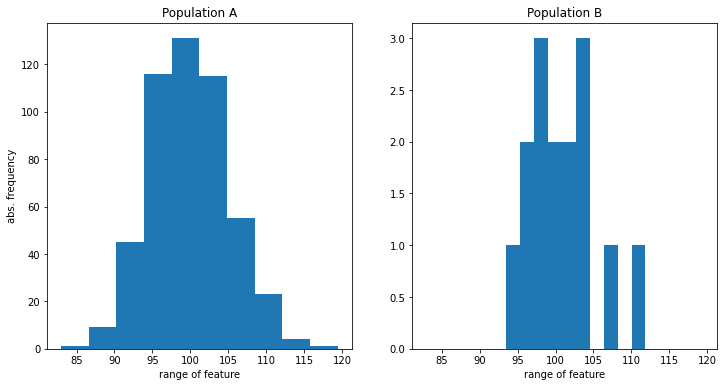

Experiment with sample-size=5, n-samples=10
Population A: mean=10, std=5, n=500
Population B: mean=10, std=5, n=15

POPULATION A
Sample mean = 11.535851585641892
Sample std  = 5.781211228902567

POPULATION B
Sample mean = 10.64389202138142
Sample std  = 4.735163719292413


In [54]:
s = Simulation(sample_size=5, n_samples=10)
s.plot_populations()
s.print_result()

## Experiment

In this little experiment, we are repeating the above simulation 100.000 times. We are counting how many times the standard deviation of sample ranges in A is larger than the one in B and vice versa.

In [55]:
a_larger_b = 0
b_larger_a = 0

for _ in range(100000):
    s = Simulation(sample_size=5, n_samples=10)
    _, a, _, b = s.get_results()
    if a > b:
        a_larger_b += 1
    else:
        b_larger_a += 1

In [56]:
print(f"Number of Simulation where std in A is larger than B = {a_larger_b}")
print(f"Number of Simulation where std in B is larger than A = {b_larger_a}")

Number of Simulation where std in A is larger than B = 61232
Number of Simulation where std in B is larger than A = 38768


We can see that in the majority of Simulations, the standard deviation of sample ranges is larger in A than in B.